In [2]:
import pandas
import seaborn as sns; sns.set(style="white", color_codes=True)
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
trips = pandas.read_csv('data/bay_area_201608_trip_data.csv', parse_dates=True, index_col=2, keep_date_col=True)


### Data Overview

In [4]:
trips

,Trip ID,Duration,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
Start Date,,,,,,,,,,
2015-09-01 00:10:00,913465,746,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
2015-09-01 00:15:00,913466,969,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2015-09-01 00:15:00,913467,233,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
2015-09-01 01:29:00,913468,213,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
2015-09-01 01:33:00,913469,574,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107
2015-09-01 01:36:00,913470,623,San Jose Diridon Caltrain Station,2,9/1/2015 1:47,Japantown,9,261,Subscriber,95112
2015-09-01 02:15:00,913471,746,Embarcadero at Bryant,54,9/1/2015 2:27,Powell Street BART,39,436,Subscriber,94103
2015-09-01 03:38:00,913472,1038,Townsend at 7th,65,9/1/2015 3:56,Howard at 2nd,63,607,Subscriber,94107
2015-09-01 04:23:00,913473,424,Market at 10th,67,9/1/2015 4:30,Townsend at 7th,65,259,Subscriber,94102


### Durations

In [5]:
avg_duration2 = trips['Duration'].mean()
print('average duration is', avg_duration2, 'seconds')

average duration is 828.8138697882298 seconds


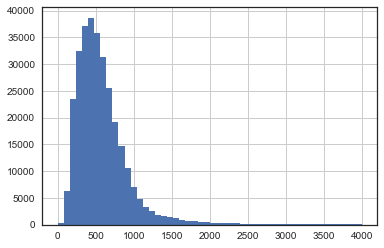

In [6]:
trips['Duration'].hist(bins=50, range=(0, 4000));

This histogram shows the durations distribution

### Week and day stats

In [18]:
one_week = trips['2015-09-07 00:00:00':'2015-09-13 23:59:59'].copy()
one_day = trips['2015-09-07 00:00:00':'2015-09-07 23:59:59'].copy()
one_month = trips['2015-09-07 00:00:00':'2015-10-06 23:59:59'].copy()

one_day.loc[:,'days'] = one_day.index.day
one_day.loc[:,'Time'] = one_day.index.hour
one_week.loc[:,'Days'] = one_week.index.day
one_week.loc[:,'Date'] = one_week.index.date
one_week.loc[:,'Time'] = one_week.index.time
one_month.loc[:,'Time'] = one_month.index.time

day_count = one_week.groupby('Days').count()['Duration']
time_count = one_month['Time'].copy()

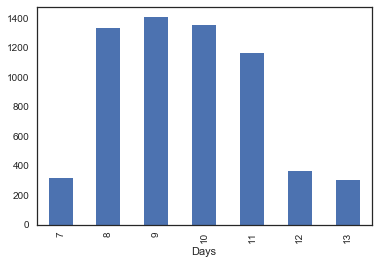

In [8]:
day_count.plot(kind='bar');

Plot of number of trips in one week in the period 07.09.2015 - 13.09.2015.
Interesting that there are so few trips monday 7.

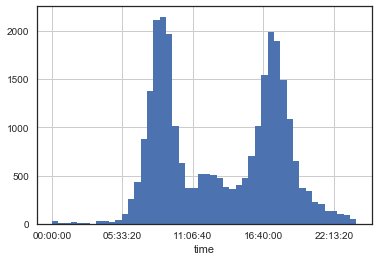

In [21]:
time_count[time_count.index.weekday < 5].hist(bins=48);

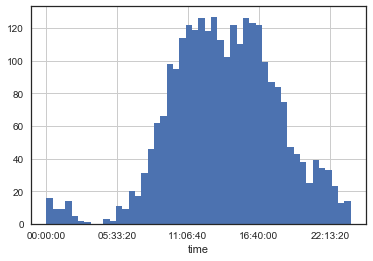

In [22]:
time_count[time_count.index.weekday >= 5].hist(bins=48);

 - Shows the distribution of trips by hour on the x-axis

In [10]:
one_week.groupby('Date').count()['Duration']

Date
2015-09-07     318
2015-09-08    1333
2015-09-09    1405
2015-09-10    1357
2015-09-11    1165
2015-09-12     360
2015-09-13     301
Name: Duration, dtype: int64

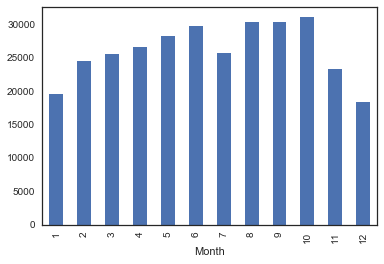

In [11]:
one_year = trips.copy()
one_year.loc[:,'Date'] = one_year.index.date
one_year.loc[:,'Weekday'] = one_year.index.weekday
one_year.loc[:, 'Month'] = one_year.index.month
year_count = one_year.groupby('Month').count()['Trip ID']
year_count.plot(kind='bar')

- Number of trips each month

### Number of trips each day

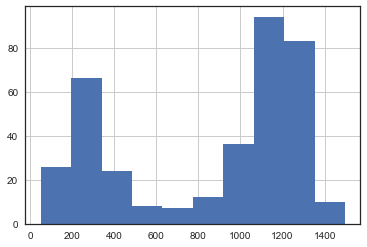

In [12]:
date_counter = one_year.groupby('Date').count()['Trip ID']
date_counter.hist();

- The x-axis is the number of biketrips in one day. The number of bike trips is mostly around 300 or 1200, and is probably due to week and weekend differences. 

### Basic statistical description of number of trips for one year

In [13]:
date_counter.describe()

count     366.000000
mean      857.073770
std       432.745422
min        50.000000
25%       338.000000
50%      1081.500000
75%      1209.750000
max      1497.000000
Name: Trip ID, dtype: float64

### Number of trips by weekdays

In [14]:
counter = one_year.groupby('Weekday').count()['Trip ID']

In [15]:
counter

Weekday
0    54064
1    62146
2    60566
3    57819
4    50616
5    15494
6    12984
Name: Trip ID, dtype: int64